In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Set random seed to 42
np.random.seed(42)

## Exercise 1

904.5072007324557
904.971821458235


Text(0, 0.5, 'sigma')

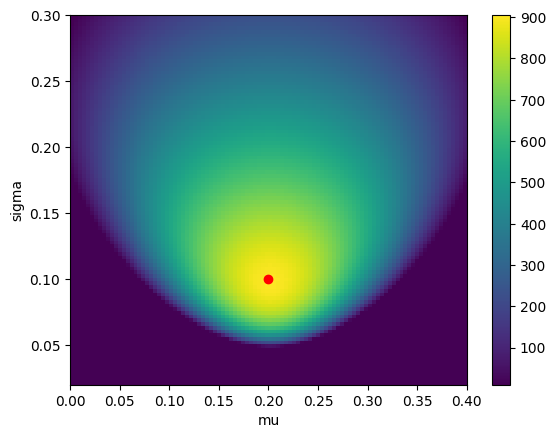

In [19]:

def log_likelihood(f):
    ll = np.sum( np.log( f ))
    return ll

def gauss(x, mu, sigma):
    g = 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2 / (2*sigma**2))
    return g 

mu_true = 0.2
sigma_true = 0.1
N = 1000

data = np.random.normal(mu_true, sigma_true, N)
ll_true = log_likelihood(gauss(data, mu_true, sigma_true))
print(ll_true)

mu_scan = np.linspace(0, 0.4, 100)
sigma_scan = np.linspace(0.02, 0.3, 100)

xy = np.meshgrid(mu_scan, sigma_scan)
ll_scan = np.zeros((len(mu_scan), len(sigma_scan)))


for i, mu in enumerate(mu_scan):
    for j, sigma in enumerate(sigma_scan):
        ll = log_likelihood(gauss(data, mu, sigma))
        ll_scan[i, j] = ll

vmin = 10
vmax = np.max(ll_scan)

print(max(ll_scan.flatten()))
plt.imshow(ll_scan.T, extent=(mu_scan[0], mu_scan[-1], sigma_scan[0], sigma_scan[-1]), 
           aspect='auto', origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
plt.plot(mu_true, sigma_true, 'ro')
plt.colorbar()
plt.xlabel('mu')
plt.ylabel('sigma')


____

## Exercise 2

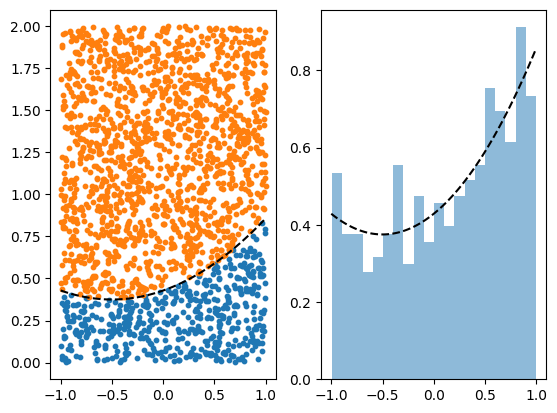

In [27]:
def norm_pdf(x, alpha, beta):
    return 1/(2 + 2/3 * beta) * (1 + alpha*x + beta*x**2)


def accept_reject(f, params, N_points, interval_x, interval_y):
    x = np.random.uniform(interval_x[0], interval_x[1], N_points)
    y = np.random.uniform(interval_y[0], interval_y[1], N_points)
    f_model = f(x, *params)

    accept = y < f_model
    x_accept = x[accept]
    y_accept = y[accept]
    x_reject = x[~accept]
    y_reject = y[~accept]
    
    return x_accept, y_accept, x_reject, y_reject

N_points = 2000
x_model = np.linspace(-1, 1, 100)
alpha = 0.5
beta = 0.5

interval_x = (-1, 1)
interval_y = (0, 2)

x_accept, y_accept, x_reject, y_reject = accept_reject(norm_pdf, (alpha, beta), N_points, interval_x, interval_y)

fig, ax = plt.subplots(1,2)
ax[0].scatter(x_accept, y_accept, s=10, label='accepted')
ax[0].scatter(x_reject, y_reject, s=10, label='rejected')
ax[0].plot(x_model, norm_pdf(x_model, alpha, beta), 'k', marker='', ls='--', label='model')
ax[1].hist(x_accept, bins=20, alpha=0.5, density=True)
ax[1].plot(x_model, norm_pdf(x_model, alpha, beta), 'k', marker='', ls='--', label='model')


